In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
# importing dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# displaying some data from the dataset
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
17,ham,Eh u remember how 2 spell his name... Yes i di...,NaN,NaN,NaN
3953,ham,I probably won't eat at all today. I think I'm...,NaN,NaN,NaN
3717,ham,Cool. Do you like swimming? I have a pool and ...,NaN,NaN,NaN
2309,ham,"I have 2 sleeping bags, 1 blanket and paper an...",NaN,NaN,NaN
3322,ham,"She said,'' do u mind if I go into the bedroom...",NaN,NaN,NaN


In [4]:
# printing the shape of data
df.shape

(5572, 5)

## 1. Data Cleaning

In [5]:
# printing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Droping the last three columns of the dataset

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
5391,ham,Watching ajith film ah?
1939,spam,More people are dogging in your area now. Call...
4779,ham,Sen told that he is going to join his uncle fi...
3664,ham,Ha... U jus ate honey ar? So sweet...
4606,ham,Been running but only managed 5 minutes and th...


In [8]:
# Replacing the column name with meaningfull words
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
5493,ham,I think if he rule tamilnadu..then its very to...
675,ham,"I dont knw pa, i just drink milk.."
4510,ham,Sorry I missed you babe. I was up late and sle...
2452,ham,Okay. I've seen it. So i should pick it on fri...
2962,ham,You dont know you jabo me abi.


In [10]:
# converting the target column data from text to number using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

here, 1 -> Spam   0 -> Ham

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Checking the null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Checking dublicate data
df.duplicated().sum()

403

In [15]:
#removing the duplicate data
df.drop_duplicates(keep = 'first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# counting the spam and ham data present in the database
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x2516f4e3f70>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

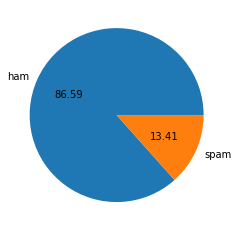

In [18]:
# Plotting the graph
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')

Data is inbalaanced

In [19]:
import nltk

In [20]:
!pip install nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhavya
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#checking the character length of the text data
df['num_characters'] = df['text'].apply(len)

In [23]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5572, dtype: int64

In [24]:
#checking the number of words of text data
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#checking the number of sentences of text data
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# printing the description of the data
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# describing the data on basis of ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# describing the data on basis of spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

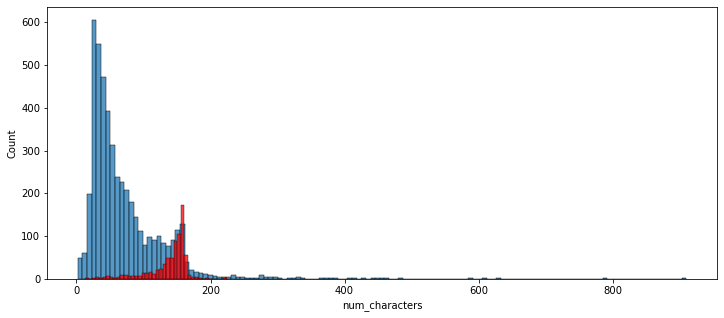

In [32]:
# Checking and printing histogram how much number of charactes are there in ham and in spam data
plt.figure(figsize = (12, 5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

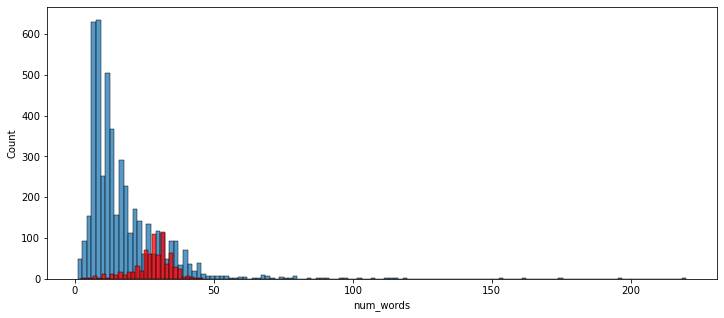

In [33]:
# Checking and printing histogram how much number of words are there in ham and in spam data
plt.figure(figsize = (12, 5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

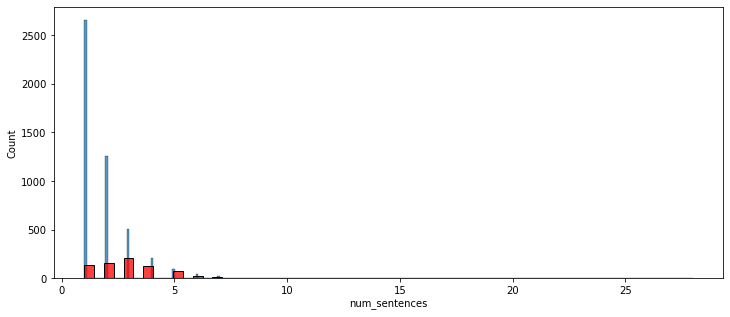

In [34]:
# Checking and printing histogramhow much number of sentences are there in ham and in spam data
plt.figure(figsize = (12, 5))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')

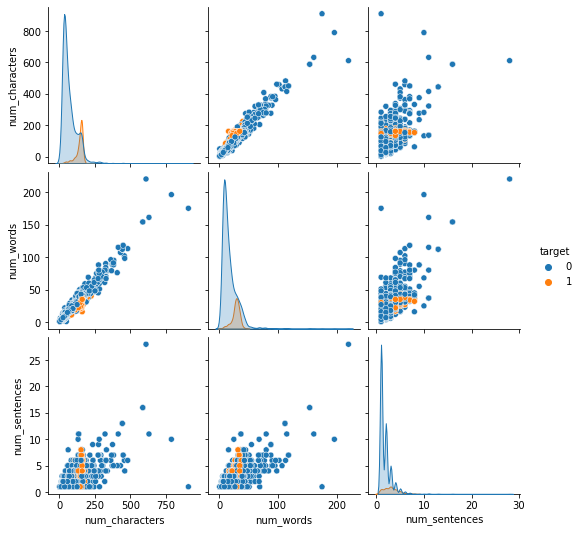

In [35]:
# Printing the pair plot graph b/w num_sentences, num_words and num_characters
sns.pairplot(df, hue = 'target')

<AxesSubplot:>

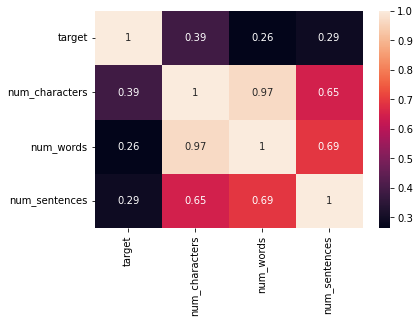

In [36]:
# Printing the heat map for checking the corelation
sns.heatmap(df.corr(), annot = True)

## Data Preprocessing

 1.) Lower Case
 
 2.) Tokenization
 
 3.) Removing Special Character
 
 4.) Removing stop words
 
 5.) Stemming
 

In [37]:
#importing stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('hugging')

'hug'

In [38]:
# importing stop words
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
# importing punctuation strings
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
# transforming text

def transform_text(text):
    #converting to lower case
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # removing the special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #applying stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
transform_text('Hello I m bhavya shah, i m 20 years old')

'hello bhavya shah 20 year old'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
df['transform_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
!pip install wordcloud

In [46]:
# Displaying the higest number of words used in the spam using word cloud

from wordcloud import WordCloud

In [47]:
wc = WordCloud(width = 1500, height = 1500, min_font_size = 20, background_color = 'black')    

In [48]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

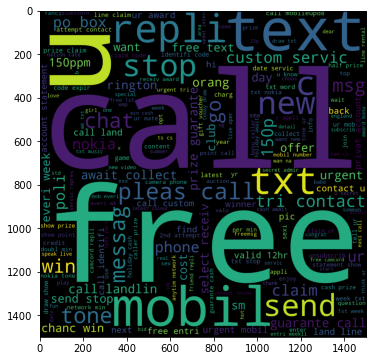

In [49]:
plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

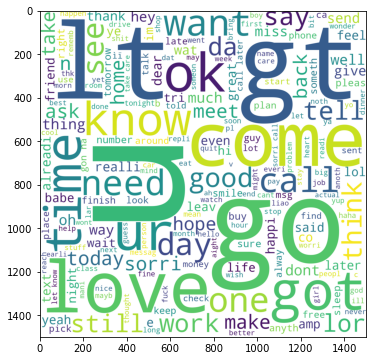

In [50]:
# Displaying the higest number of words used in the ham using word cloud
plt.figure(figsize = (12, 6))
wc = WordCloud(width = 1500, height = 1500, min_font_size = 20, background_color = 'white')
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)

In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

11490

In [53]:
# diplaying the top 30 common words used in spam
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

C:\Users\Bhavya Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


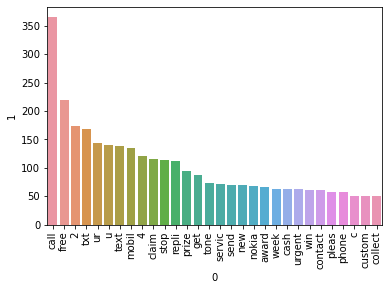

In [54]:
# Creating the tick graph of the most common word in the spam
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)


38205

C:\Users\Bhavya Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


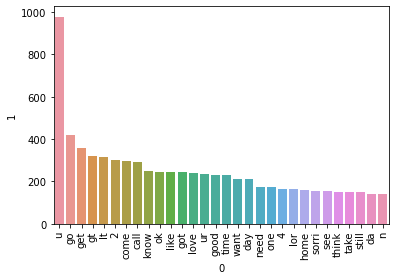

In [57]:
# Creating the tick graph of the most common word in the ham
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [58]:
# Extracting the features from text using count vectorizer, tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [60]:
X.shape

(5572, 3000)

In [61]:
y = df['target'].values

In [62]:
y.shape

(5572,)

In [63]:
#spliting the data into test and train
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
# importing the model libraries
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
# creating the object Gaussian Naive Bayes, Multinomial Naive Bayes, Bernoulli Naive Bayes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
# model training code of Gaussian Naive Bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [68]:
# model training code of Multinomial Naive Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [69]:
# model training code of Bernoulli Naive Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9766816143497757
[[955   2]
 [ 24 134]]
0.9852941176470589


In [70]:
# importing all the model libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
# creating the object of all the algorithms

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [72]:
# creating the dictionary of all the model object
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
# Creating the accuracy and precision score

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9704035874439462, 0.9844961240310077)

In [75]:
# printing the accuracy and precision socre for all the algo's

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9704035874439462
Precision -  0.9844961240310077
For  KN
Accuracy -  0.905829596412556
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9246636771300448
Precision -  0.8775510204081632
For  LR
Accuracy -  0.9515695067264573
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9659192825112107
Precision -  0.9918032786885246
For  AdaBoost
Accuracy -  0.9596412556053812
Precision -  0.959349593495935
For  BgC
Accuracy -  0.9596412556053812
Precision -  0.9312977099236641
For  ETC
Accuracy -  0.967713004484305
Precision -  0.9919354838709677
For  GBDT
Accuracy -  0.9363228699551569
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9623318385650225
Precision -  0.9754098360655737


In [76]:
# converting the accuracy and precision score output in the dataframe in sorted form on basis of precision scrore
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905830,1.000000
8,ETC,0.967713,0.991935
5,RF,0.965919,0.991803
2,NB,0.965022,0.991736
0,SVC,0.970404,0.984496
10,xgb,0.962332,0.975410
4,LR,0.951570,0.964286
6,AdaBoost,0.959641,0.959350
7,BgC,0.959641,0.931298
9,GBDT,0.936323,0.930693


In [78]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [79]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905830
1,ETC,Accuracy,0.967713
2,RF,Accuracy,0.965919
3,NB,Accuracy,0.965022
4,SVC,Accuracy,0.970404
5,xgb,Accuracy,0.962332
6,LR,Accuracy,0.951570
7,AdaBoost,Accuracy,0.959641
8,BgC,Accuracy,0.959641
9,GBDT,Accuracy,0.936323


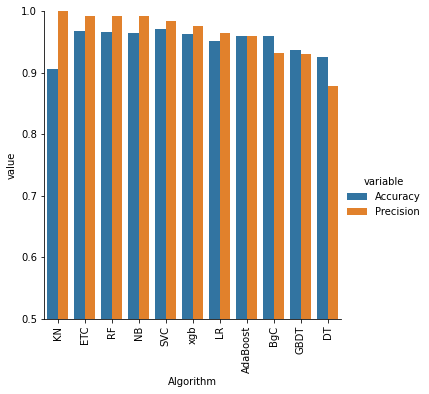

In [80]:
# visualitation in graphical format

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
# model improvement (hyper-parameter-tuning)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905830,1.000000
8,ETC,0.967713,0.991935
5,RF,0.965919,0.991803
2,NB,0.965022,0.991736
0,SVC,0.970404,0.984496
10,xgb,0.962332,0.975410
4,LR,0.951570,0.964286
6,AdaBoost,0.959641,0.959350
7,BgC,0.959641,0.931298
9,GBDT,0.936323,0.930693


In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.905830,1.000000
8,ETC,0.967713,0.991935
5,RF,0.965919,0.991803
2,NB,0.965022,0.991736
0,SVC,0.970404,0.984496
10,xgb,0.962332,0.975410
4,LR,0.951570,0.964286
6,AdaBoost,0.959641,0.959350
7,BgC,0.959641,0.931298
9,GBDT,0.936323,0.930693


In [83]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,KN,0.905830,1.000000,0.905830,1.000000
1,ETC,0.967713,0.991935,0.967713,0.991935
2,RF,0.965919,0.991803,0.965919,0.991803
3,NB,0.965022,0.991736,0.965022,0.991736
4,SVC,0.970404,0.984496,0.970404,0.984496
5,xgb,0.962332,0.975410,0.962332,0.975410
6,LR,0.951570,0.964286,0.951570,0.964286
7,AdaBoost,0.959641,0.959350,0.959641,0.959350
8,BgC,0.959641,0.931298,0.959641,0.931298
9,GBDT,0.936323,0.930693,0.936323,0.930693


In [84]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.905830,1.000000,0.905830,1.000000,0.905830,1.000000
1,ETC,0.967713,0.991935,0.967713,0.991935,0.967713,0.991935
2,RF,0.965919,0.991803,0.965919,0.991803,0.965919,0.991803
3,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
4,SVC,0.970404,0.984496,0.970404,0.984496,0.970404,0.984496
5,xgb,0.962332,0.975410,0.962332,0.975410,0.962332,0.975410
6,LR,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286
7,AdaBoost,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350
8,BgC,0.959641,0.931298,0.959641,0.931298,0.959641,0.931298
9,GBDT,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693


In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.905830,1.000000
8,ETC,0.967713,0.991935
5,RF,0.965919,0.991803
2,NB,0.965022,0.991736
0,SVC,0.970404,0.984496
10,xgb,0.962332,0.975410
4,LR,0.951570,0.964286
6,AdaBoost,0.959641,0.959350
7,BgC,0.959641,0.931298
9,GBDT,0.936323,0.930693


In [86]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905830,1.000000,0.905830,1.000000,0.905830,1.000000,0.905830,1.000000
1,ETC,0.967713,0.991935,0.967713,0.991935,0.967713,0.991935,0.967713,0.991935
2,RF,0.965919,0.991803,0.965919,0.991803,0.965919,0.991803,0.965919,0.991803
3,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
4,SVC,0.970404,0.984496,0.970404,0.984496,0.970404,0.984496,0.970404,0.984496
5,xgb,0.962332,0.975410,0.962332,0.975410,0.962332,0.975410,0.962332,0.975410
6,LR,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286,0.951570,0.964286
7,AdaBoost,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350,0.959641,0.959350
8,BgC,0.959641,0.931298,0.959641,0.931298,0.959641,0.931298,0.959641,0.931298
9,GBDT,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693,0.936323,0.930693


In [87]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
#mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [88]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [89]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [90]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9775784753363229
Precision 1.0


In [91]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [92]:
from sklearn.ensemble import StackingClassifier

In [93]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [94]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9802690582959641
Precision 0.9857142857142858


In [95]:
# Creating the Pickle file of the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))